<a href="https://colab.research.google.com/github/Malekkamoua/PFE/blob/main/.addixo/0_Cleaning_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path_protocol = '/content/gdrive/MyDrive/Datascience/PFE/Data/merged_pp.txt'
path_alarm = '/content/gdrive/MyDrive/Datascience/PFE/Data/alarm_merged_new.txt'

In [ ]:
import re

# Using readlines()
file1 = open(path_protocol, 'r')
Lines = file1.readlines()
  
count = 0

opened_file = open('/content/modified_pp.txt', 'a')

for line in Lines:
    count += 1
    line = re.sub('  +', ' ', line)
    line  = line + '\n'
    
    opened_file.write(line)
    #print("Line{}: {}".format(count, line.strip()))
print('finish')
opened_file.close()


finish


In [ ]:
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("modified_pp.txt", sep=" ", header=None, 
                 names=['cpt_cyc_protocoles', 't008', 't007', 'nb_total_pieces', 'cpt_cyc_machine',
                        'temps_cycle', 'temps_dosage' , 'temps_injection' , 'pression_com', 'volume_com' ,'matelas','val_pointe','integral'])
  
# display DataFrame
df.head()

,cpt_cyc_protocoles,t008,t007,nb_total_pieces,cpt_cyc_machine,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral
0,7583,2.01,22:30,30688,7672,27.50,-,3.57,779,16.5,10.87,1062,76
1,7584,2.01,22:31,30692,7673,28.39,5.37,3.56,1315,16.5,16.27,1334,126
2,7585,2.01,22:31,30696,7674,27.28,4.36,3.57,1332,16.5,16.28,1344,125
3,7586,2.01,22:35,30728,7682,26.95,4.11,3.56,1353,16.5,16.27,1371,128
4,7587,2.01,22:35,30732,7683,26.98,4.09,3.55,1354,16.5,16.26,1374,130


In [ ]:
df['t008'] = df['t008'].astype(str).str.replace('.','/')
df['t008'] = df['t008'] + '/2022 '
df["date"] = df["t008"].astype(str) + df["t007"]
df['date'] = df['date'].astype('datetime64[ns]')
df.drop(['t008', 't007'], axis=1, inplace=True)

my_column = df.pop('date')
df.insert(0, my_column.name, my_column) 
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,date,cpt_cyc_protocoles,nb_total_pieces,cpt_cyc_machine,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral
0,2022-02-01 22:30:00,7583,30688,7672,27.50,-,3.57,779,16.5,10.87,1062,76
1,2022-02-01 22:31:00,7584,30692,7673,28.39,5.37,3.56,1315,16.5,16.27,1334,126
2,2022-02-01 22:31:00,7585,30696,7674,27.28,4.36,3.57,1332,16.5,16.28,1344,125
3,2022-02-01 22:35:00,7586,30728,7682,26.95,4.11,3.56,1353,16.5,16.27,1371,128
4,2022-02-01 22:35:00,7587,30732,7683,26.98,4.09,3.55,1354,16.5,16.26,1374,130
...,...,...,...,...,...,...,...,...,...,...,...,...
94523,2022-03-28 12:24:00,102110,414096,103524,27.04,4.06,3.49,1351,16.5,16.39,1363,144
94524,2022-03-28 12:24:00,102111,414100,103525,27.07,4.03,3.48,1349,16.5,16.34,1369,143
94525,2022-03-28 12:25:00,102112,414104,103526,27.00,4.02,3.48,1344,16.5,16.39,1359,144
94526,2022-03-28 12:25:00,102113,414108,103527,27.05,4.04,3.48,1352,16.5,16.40,1365,144


In [ ]:
# computing number of rows
rows = len(df.axes[0])
  
# computing number of columns
cols = len(df.axes[1])
  
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  94528
Number of Columns:  12


In [ ]:
object_columns = (df
                  .select_dtypes(include="float64")
                  .columns)

for column in object_columns:
    print("{} has {} unique values."
          .format(column, 
                  df[column]
                  .nunique()))

temps_cycle has 143 unique values.
temps_injection has 14 unique values.
volume_com has 7 unique values.
matelas has 138 unique values.


In [ ]:
print(df.shape)
print(list(df.columns))
print(df.duplicated())
df.drop_duplicates(keep = False, inplace = True)
print(df.shape)

(94528, 12)
['date', 'cpt_cyc_protocoles', 'nb_total_pieces', 'cpt_cyc_machine', 'temps_cycle', 'temps_dosage', 'temps_injection', 'pression_com', 'volume_com', 'matelas', 'val_pointe', 'integral']
0        False
1        False
2        False
3        False
4        False
         ...  
94523    False
94524    False
94525    False
94526    False
94527    False
Length: 94528, dtype: bool
(94528, 12)


In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent],
                              axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = (mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1))

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


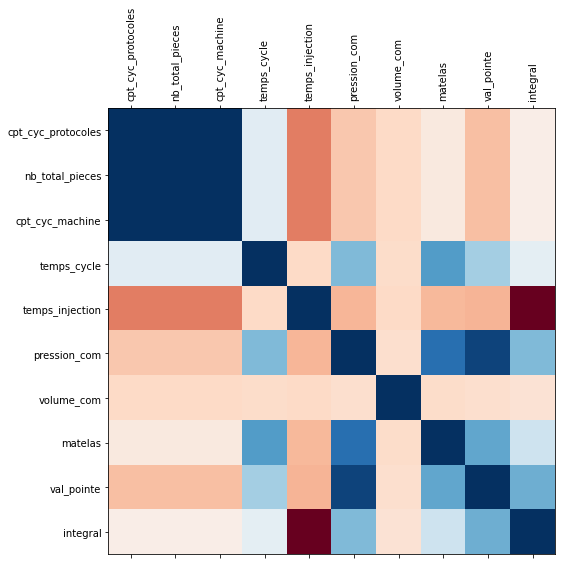

In [ ]:
corr = df.corr()

fig = plt.figure(figsize=(8,8)) 

plt.matshow(corr, cmap='RdBu', fignum=fig.number) 
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
# read text file into pandas DataFrame
df_alarm = pd.read_csv(path_alarm, sep=",", header=None, 
                 names=['date_alarm', 'time' ,'alarm'])
  
# display DataFrame
df_alarm.head(3)

,date_alarm,time,alarm
0,02/01/22,14:29:24,S195 Arrêt d'urgence système de robots ...
1,03/01/22,08:58:14,t4052 Temps sécurité moule valeur réelle supé...
2,03/01/22,08:58:21,t4052 Temps sécurité moule valeur réelle supé...


In [ ]:
df_alarm['time'] = df_alarm['time'].str[:6]
df_alarm["date"] = df_alarm["date_alarm"].astype(str) + df_alarm["time"]
df_alarm['date'] = df_alarm['date'].astype('datetime64[ns]')
df_alarm.drop(['date_alarm', 'time'], axis=1, inplace=True)

my_column = df_alarm.pop('date')
df_alarm.insert(0, my_column.name, my_column) 

In [ ]:
df_alarm

,date,alarm
0,2022-02-01 14:29:00,S195 Arrêt d'urgence système de robots ...
1,2022-03-01 08:58:00,t4052 Temps sécurité moule valeur réelle supé...
2,2022-03-01 08:58:00,t4052 Temps sécurité moule valeur réelle supé...
3,2022-03-01 09:37:00,t4052 Temps sécurité moule valeur réelle supé...
4,2022-03-01 09:37:00,t4052 Temps sécurité moule valeur réelle supé...
...,...,...
124,2022-03-24 06:39:00,t4052 Temps sécurité moule valeur réelle supé...
125,2022-03-24 06:39:00,t4052 Temps sécurité moule valeur réelle supé...
126,2022-03-27 15:49:00,S195 Arrêt d'urgence système de robots
127,2022-03-29 06:32:00,S195 Arrêt d'urgence système de robots


In [ ]:
df.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/protocol_2022.csv', index=True)
df_alarm.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/alarm_2022.csv', index=True)

In [71]:
protocol_df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/protocol_2022.csv', parse_dates=['date'],infer_datetime_format=True)
alarm_df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/alarm_2022.csv', parse_dates=['date'],  infer_datetime_format=True)

In [72]:
protocol_df.drop(['Unnamed: 0'], axis=1, inplace=True)
alarm_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [73]:
protocol_df['date'] = pd.to_datetime(protocol_df['date'])
alarm_df['date'] = pd.to_datetime(alarm_df['date'])

In [74]:
protocol_df['duration'] = protocol_df[['temps_cycle', 'temps_dosage', 'temps_injection']].sum(axis=1)

def conditions(s):
    if (s['duration'] < 36.05) and (s['duration'] > 33.29) :
        return 1
    else:
        return 0

protocol_df['duration_c'] = protocol_df.apply(conditions, axis=1)

In [75]:
protocol_df['pression'] = protocol_df[['pression_com', 'val_pointe']].sum(axis=1)

def conditions(s):
    if (s['pression'] < 2767) and (s['pression'] > 2235) :
        return 1
    else:
        return 0

protocol_df['pression_c'] = protocol_df.apply(conditions, axis=1)

In [76]:
protocol_df['volume'] = protocol_df[['volume_com', 'matelas']].sum(axis=1)

def conditions(s):
    if (s['volume'] < 34.8) and (s['volume'] > 30.8) :
        return 1
    else:
        return 0

protocol_df['volume_c'] = protocol_df.apply(conditions, axis=1)

In [77]:
protocol_df['label'] = 0

def conditions(s):
    if (s['duration_c'] == 1) and (s['pression_c'] == 1) and (s['volume_c'] == 1) :
        return 1
    else:
        return 0

protocol_df['label'] = protocol_df.apply(conditions, axis=1)

label
0      583
1    93945
dtype: int64


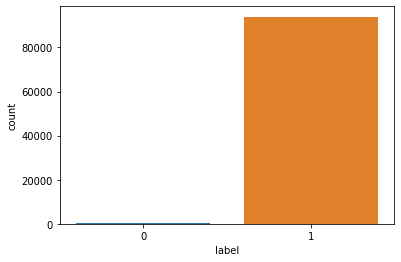

In [78]:
import seaborn as sns

print(protocol_df.groupby(['label']).size())

sns.countplot(x ='label', data = protocol_df)

In [79]:
protocol_df = protocol_df.drop_duplicates('date',keep='last')

In [82]:
protocol_df.drop(['duration_c', 'volume_c', 'pression_c'], axis=1, inplace=True)
protocol_df.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/new_dataset.csv', index=False)